In [5]:
import import_ipynb
%run localisation.ipynb

import pandas as pd

plt.rcParams["figure.figsize"] = (13,9) # To change plot size

In [1]:
#!pip install import-ipynb

You should consider upgrading via the 'c:\users\vincent\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=fe609239a31821fadbb56d00fa2ab48e0e7a190ec8d25fcc5e4cbcc051eb9f49
  Stored in directory: c:\users\vincent\appdata\local\pip\cache\wheels\14\d1\f8\04883e42b40c1d3d24cb6579b16c63d4735bb1c8b82c5d29e3
Successfully built import-ipynb


# Thymio data aquisition
May be useful to set the constants

In [1]:
TRSH_DT = 0.2 # treshold on the derivative, to find the edges on map
SCALE_DT = 1000 # scaling to display dt and normal on the same plot

tele = pd.read_csv('read.csv', low_memory=False)

tele = tele.rename(columns = {' m[0] ' : "speed", 
                                        ' m[1] ' : "ground",
                                        ' "timestamp"' : "time"})

# Derivative with respect to time
time_step = tele['time'][1] - tele['time'][0]

tele["ground_dt"] = tele["ground"]
tele["ground_dt"][0] = 0

tele["ground_dt"][1:len(tele['time'])] = [(tele["ground"][i] - tele["ground"][i-1])/time_step for i in range(1, len(tele['time']))]


# plot
plt.plot(tele.time, tele.ground, label='Ground')
plt.plot(tele.time, SCALE_DT*tele.ground_dt, label='Ground derivative')
plt.hlines(SCALE_DT*TRSH_DT, 0, max(tele.time), linestyles='dashed', color='red', label="threshold value")
plt.hlines(-SCALE_DT*TRSH_DT, 0, max(tele.time), linestyles='dashed', color='red', label="threshold value")

plt.xlabel("Time [s]")
plt.ylabel("Value")

plt.show()

NameError: name 'pd' is not defined

Standard deviation at speed 100 : Left 8.193	Right 6.17
Mean at speed 100 : Left 100.758	Right 98.818


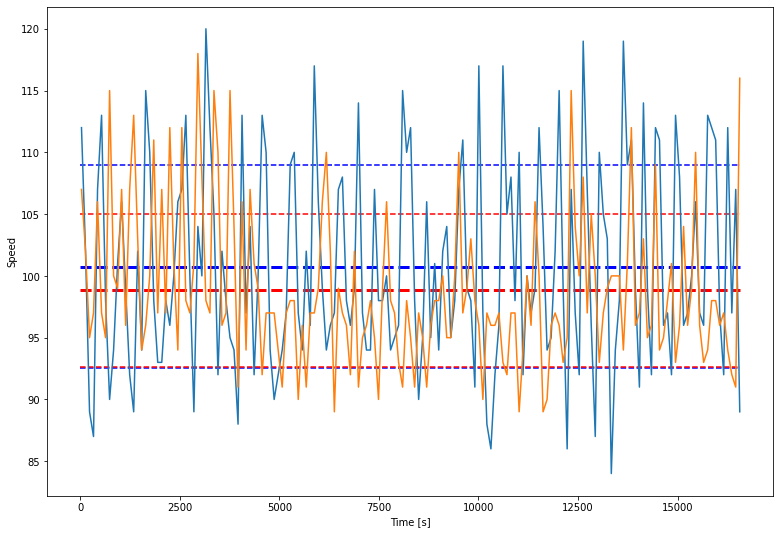

In [4]:
# Check motor noise
speed = '100'

tele = pd.read_csv('speed' +speed+'.csv', low_memory=False)

tele = tele.rename(columns = {' m[0] ' : "left", 
                            ' m[1] ' : "right",
                            ' "timestamp"' : "time"})


# plot
print(f"Standard deviation at speed {speed} : Left {round(np.std(tele.left),3)}\tRight {round(np.std(tele.right),3)}")
print(f"Mean at speed {speed} : Left {round(np.mean(tele.left),3)}\tRight {round(np.mean(tele.right),3)}")

plt.plot(tele.time, tele.left, label='left')
plt.plot(tele.time, tele.right, label='right')
plt.hlines(np.mean(tele.left), 0, max(tele.time), linestyles='dashed', color='blue', linewidth=3)
plt.hlines(np.mean(tele.left)+np.std(tele.left), 0, max(tele.time), linestyles='dashed', color='blue')
plt.hlines(np.mean(tele.left)-np.std(tele.left), 0, max(tele.time), linestyles='dashed', color='blue')
plt.hlines(np.mean(tele.right), 0, max(tele.time), linestyles='dashed', color='red', linewidth=3)
plt.hlines(np.mean(tele.right)+np.std(tele.right), 0, max(tele.time), linestyles='dashed', color='red')
plt.hlines(np.mean(tele.right)-np.std(tele.right), 0, max(tele.time), linestyles='dashed', color='red')

plt.xlabel("Time [s]")
plt.ylabel("Speed")

plt.show()

## Testing the classes

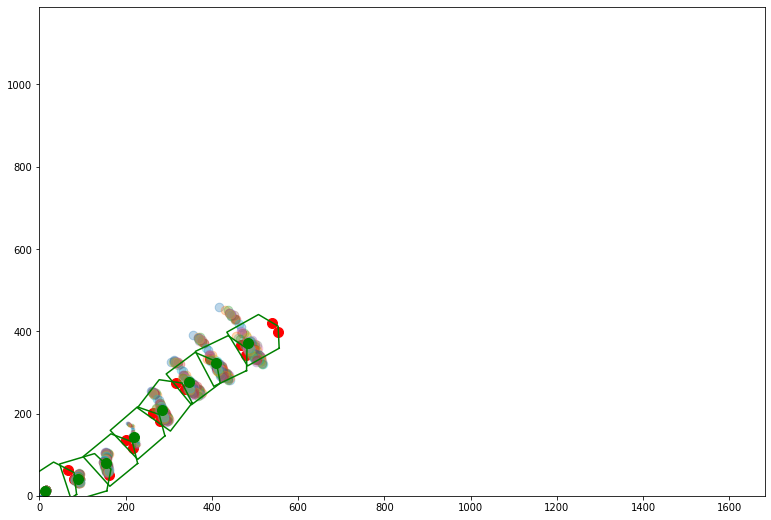

In [9]:
MAX_SPEED = 560
MIN_SPEED = 100
MAX_PROX = 1000
DT = 10
NB_PARTICLES = 100


myPose = Pose(0,0,math.pi/4, isLost=False, nb_particles=NB_PARTICLES)

for i in range(40):
    speed = [random.randrange(MIN_SPEED, MAX_SPEED), random.randrange(MIN_SPEED, MAX_SPEED)]
    prox = expected_prox(myPose.get_coords())
    
    # add noise on the prox
    prox[0] += random.gauss(0, PROX_L_STD)
    prox[1] += random.gauss(0, PROX_R_STD)

    myPose.update(speed, prox, DT)
    
    # plot only 1 on 5 steps
    if i%5 == 0:
        myPose.plot(plot_theta=False, theta_size=5, plot_particles=True)
    
plt.scatter(0, 0, marker='+')
plt.xlim(0, MAP_REAL[0])
plt.ylim(0, MAP_REAL[1])
plt.show()


# Testing on the thymio
This is not implemented for now. IT WILL NOT WORK !

In [104]:
# from tdmclient import ClientAsync
# client = ClientAsync()
# node = await client.wait_for_node()
# await node.lock()

In [105]:
# Ts = 0.1
# gnd_prev = [0, 0]
# SPEED = 50
# 
# def motors(left, right):
#     return {
#         "motor.left.target": [left],
#         "motor.right.target": [right],
#     }
# 
# def on_variables_changed(node, variables):
#     try:
#         gnd = variables["prox.ground.reflected"]
#         d_gnd = gnd-gnd_prev
#         gnd_prev = gnd
#         
#         if d_gnd < -10:
#             node.send_set_variables({'leds.top': [255, 255, 0]})
#         if d_gnd > 10:
#             node.send_set_variables({'leds.top': [0, 0, 255]})            
# 
#     except KeyError:
#         pass  # prox.horizontal not found
# 
# 
# async def prog():
#     await node.watch(variables=True)
#     node.send_set_variables(motors(SPEED, SPEED))
#     node.add_variables_changed_listener(on_variables_changed)
#     await client.sleep()
# client.run_async_program(prog)

In [106]:
# node.send_set_variables(motors(0, 0))
# await node.unlock()